In [20]:
%run "../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = hand;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')

<IPython.core.display.Javascript object>

In [4]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 
df.insert(4, 'npt',0)
df.insert(4, 'pef',0)
df.npt = pd.notnull(df.pef1)*1 + pd.notnull(df.pef2)*1 + pd.notnull(df.pef3)*1
df = df[df.npt > 0]
df=df.reset_index(drop=True)
df.pef = (df.pef1 + df.pef2 + df.pef3)/df.npt

#2. Combine 
df=df.fillna(0)
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
sdttm = df.dateofmeasure + " " + df.timeofday 
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pef, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

s= pd.qcut(df1.pefmax, 10, labels='a1,a2,a3,a4,a5,a6,a7,a8,a9,a10'.split(','))
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)

columns = '''pefmax,so2,co,o3,no2,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,tmax,amax,tmin'''
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
displayDFs (df1, maxrows=3 )

In [16]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 
df.insert(4, 'npt',0)
df.insert(4, 'pef',0)
df.npt = pd.notnull(df.pef1)*1 + pd.notnull(df.pef2)*1 + pd.notnull(df.pef3)*1
df = df[df.npt > 0]
df=df.reset_index(drop=True)
df.pef = (df.pef1 + df.pef2 + df.pef3)/df.npt

#2. Combine 
df=df.fillna(0)
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
sdttm = df.dateofmeasure + " " + df.timeofday 
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pef, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

s= pd.qcut(df1.pefmax, 10, labels='1,2,3,4,5,6,7,8,9,10'.split(','))
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)

columns = '''pefcat,so2,co,o3,no2,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,tmax,amax,tmin'''
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
displayDFs (df1, maxrows=3 )

In [10]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf = nn;

Y_SCALER = None
#Normalize the input and save the scalar for outcome variable "pefmax" in this case.
scaler = StandardScaler()
dp = prepareDF(df1, True)
for c in dp.columns:
    if ( c == 'pefcat'):
        #Y_SCALER = StandardScaler()
        #dp[c] = Y_SCALER.fit_transform(dp[c])
        pass;
    else:
        dp[c] = scaler.fit_transform(dp[c])
        
#dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

X = dp1.ix[:, dp1.columns != 'pefcat']
y = dp1.pefcat 
X = X.as_matrix().astype(np.float)


kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
y_pred = y.copy()

# Iterate through folds\
i = 0;
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    # Initialize a classifier with key word arguments\
    print ("*",i, end ="");
    clf.fit(X_train,y_train)
    y_pred[test_index] = clf.predict(X_test)
    i = i +1;



Dropping in prepareDF -  Index([], dtype='object')
* 0* 1* 2* 3* 4

Feature space holds 1213 observations and 15 features
Unique target labels: ['10' '8' '7' '4' '5' '3' '6' '9' '1' '2']
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.145919 
   DecisionTree Gini r^2 score: -0.603215
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.168178 
   DecisionTree Entr r^2 score: -0.726990
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.185491 
                 SVM r^2 score: -0.699551
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.154988 
                K-NN r^2 score: -0.819291
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.135202 
   Gradient Boosting r^2 score: -0.766230
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.159934 
    Logit Regression r^2 score: -0.808295
* 0* 1* 2* 3* 4*
           Neural NW accuracy: 0.152514 
           Neural NW r^2 score: -0.804361


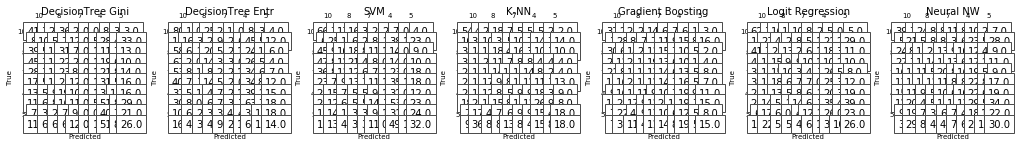

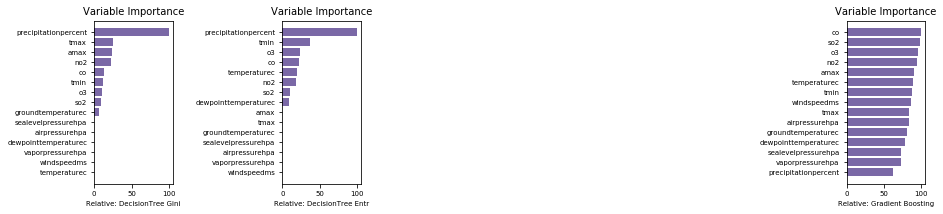

In [19]:
predictColumn = "pefcat"
cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(), 
        #"Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1)
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)
